# 1: Import Libraries

In [2]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


# 2: Load and Explore the Dataset

In [4]:
# Load the dataset
df = pd.read_csv('wine.csv')

# Display the first few rows
print(df.head())



   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


In [5]:
# Basic info and statistics
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  17

# 3: Visualize Feature Distributions

In [6]:
# Exclude the target column for feature plots
features = df.columns[1:]


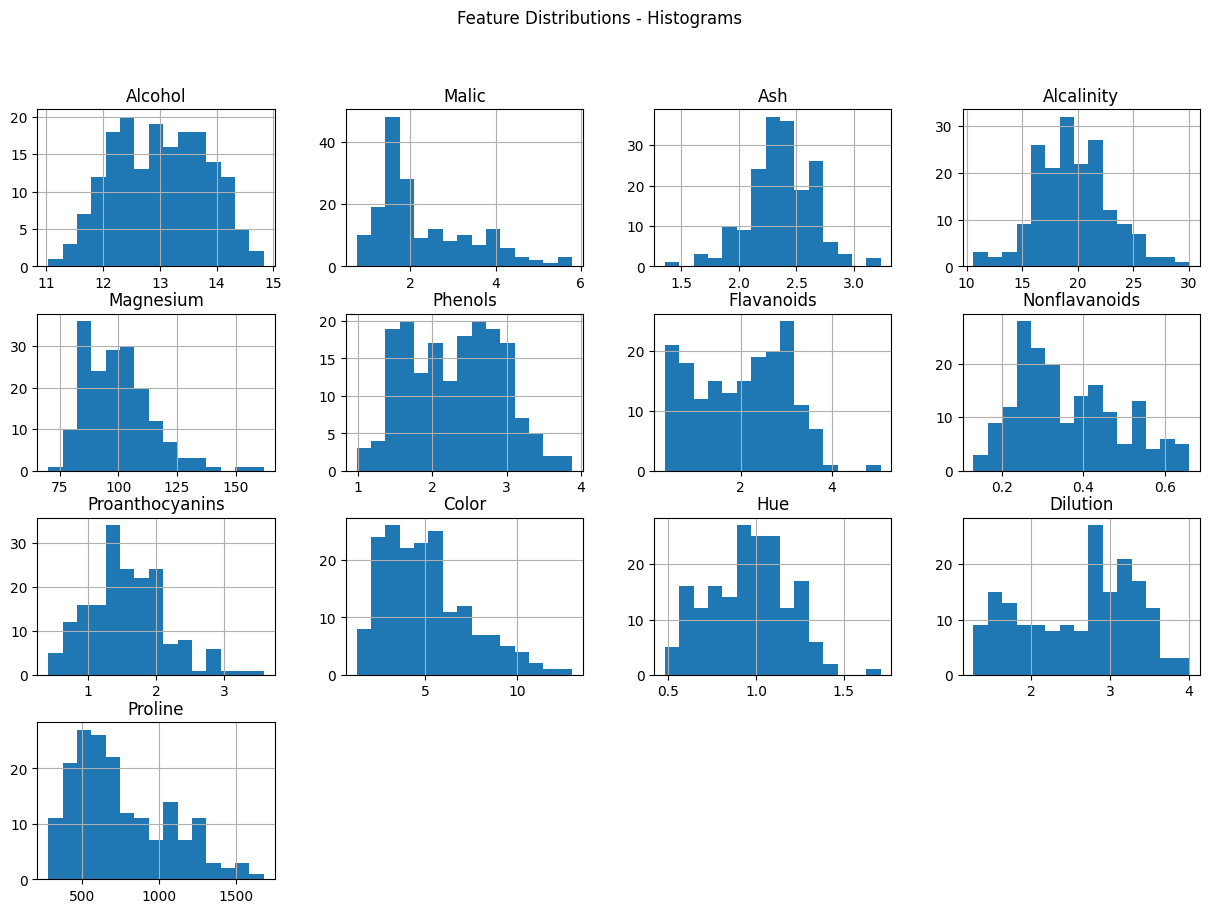

In [7]:
# Histograms
df[features].hist(bins=15, figsize=(15, 10))
plt.suptitle('Feature Distributions - Histograms')
plt.show()

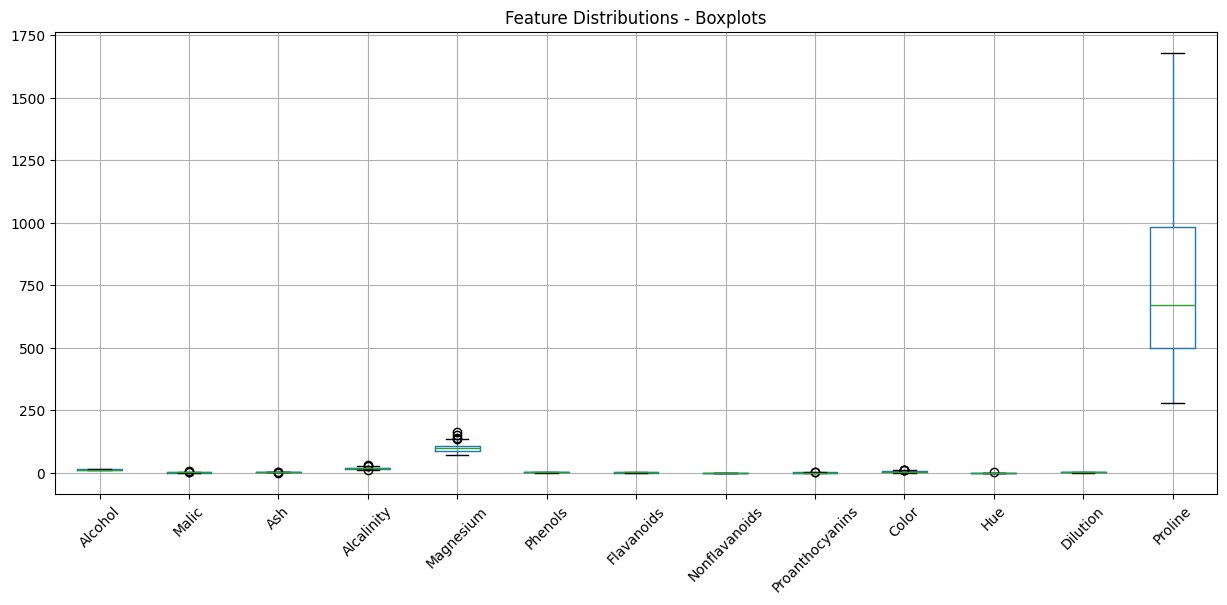

In [8]:
# Boxplots
plt.figure(figsize=(15, 6))
df[features].boxplot()
plt.title('Feature Distributions - Boxplots')
plt.xticks(rotation=45)
plt.show()

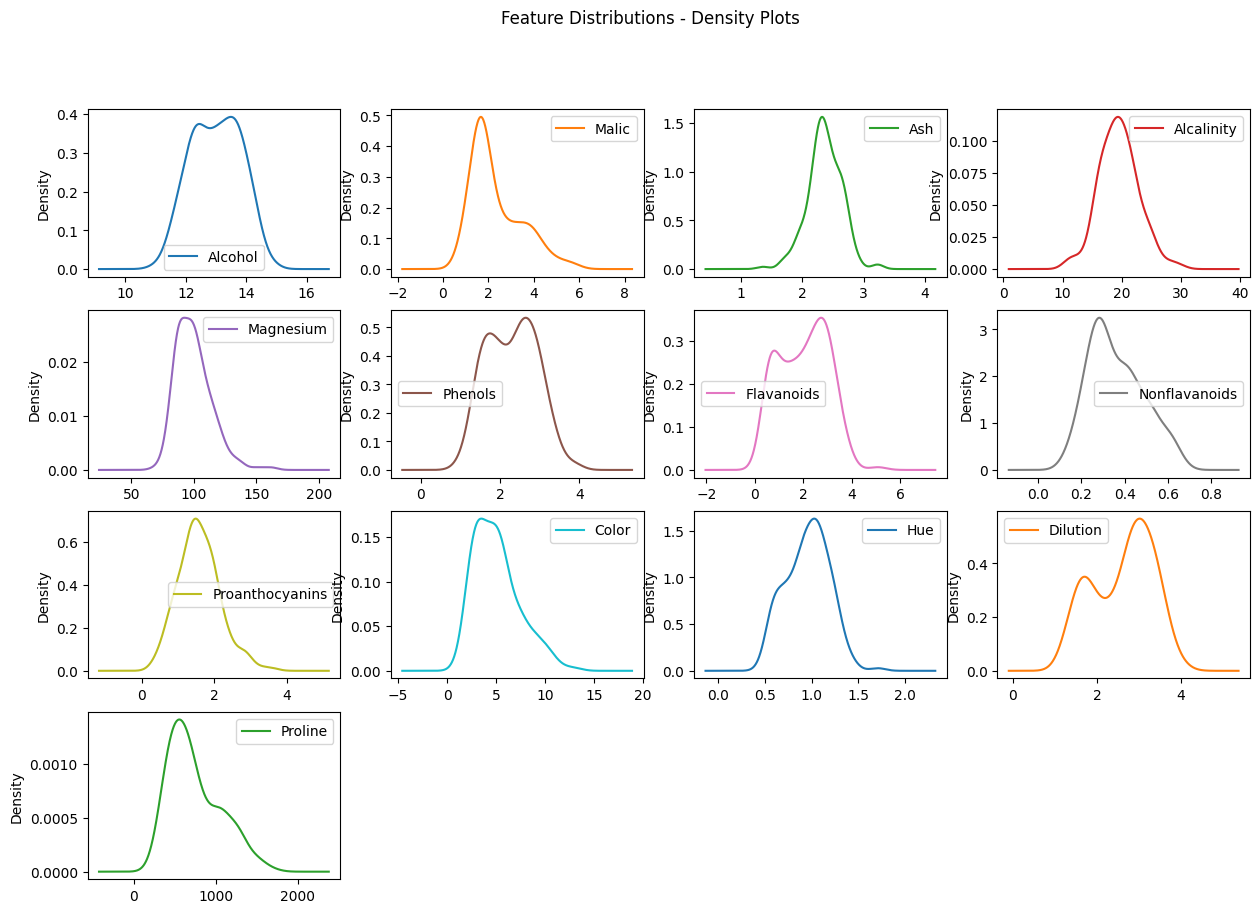

In [9]:
# Density plots
df[features].plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(15,10))
plt.suptitle('Feature Distributions - Density Plots')
plt.show()

# 4: Correlation Analysis

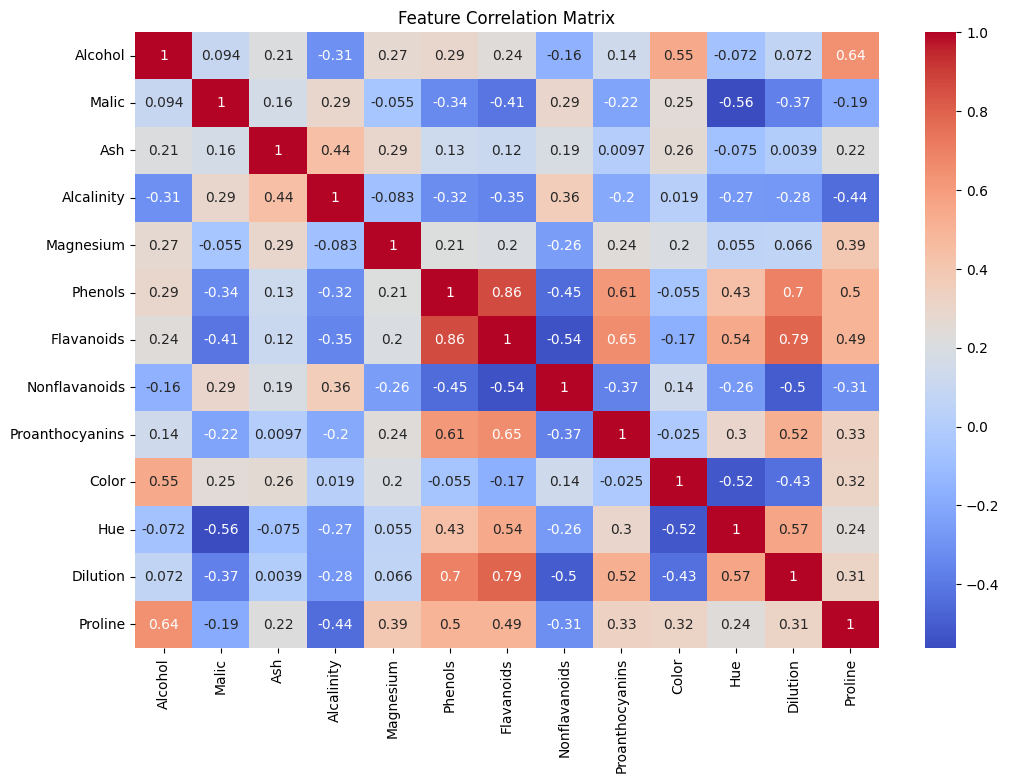

In [10]:
# Correlation matrix
corr = df[features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


# 5: Standardize Features

In [11]:
# Standardize the features (excluding the target column)
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


6: PCA - Dimensionality Reduction

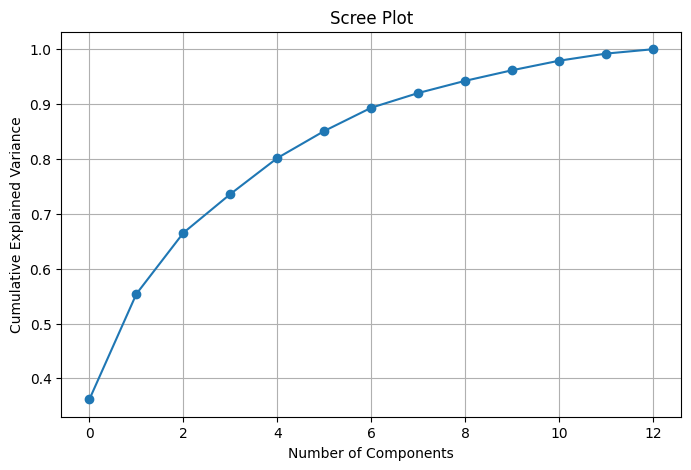

In [13]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree plot (explained variance)
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [14]:
# Choose number of components (e.g., 2 for visualization)
n_components = 2
pca = PCA(n_components=n_components)
X_pca_2d = pca.fit_transform(X_scaled)
print(f'Explained variance by {n_components} components:', np.sum(pca.explained_variance_ratio_))

Explained variance by 2 components: 0.5540633835693527


# 7: Clustering on Original Data

In [15]:
# K-means clustering (choose k=3 for wine dataset)
k = 3
kmeans_orig = KMeans(n_clusters=k, random_state=42)
labels_orig = kmeans_orig.fit_predict(X_scaled)


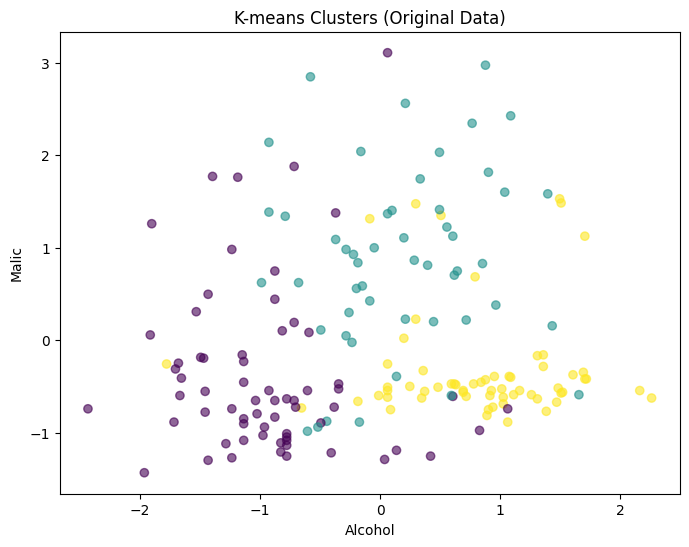

In [16]:
# Visualize clusters (using first two features for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_orig, cmap='viridis', alpha=0.6)
plt.title('K-means Clusters (Original Data)')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()

In [17]:
# Clustering metrics
silhouette_orig = silhouette_score(X_scaled, labels_orig)
db_orig = davies_bouldin_score(X_scaled, labels_orig)
print('Silhouette Score (Original):', silhouette_orig)
print('Davies-Bouldin Index (Original):', db_orig)


Silhouette Score (Original): 0.2848589191898987
Davies-Bouldin Index (Original): 1.3891879777181648


# 8: Clustering on PCA Data

In [18]:
# K-means clustering on PCA-reduced data
kmeans_pca = KMeans(n_clusters=k, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca_2d)

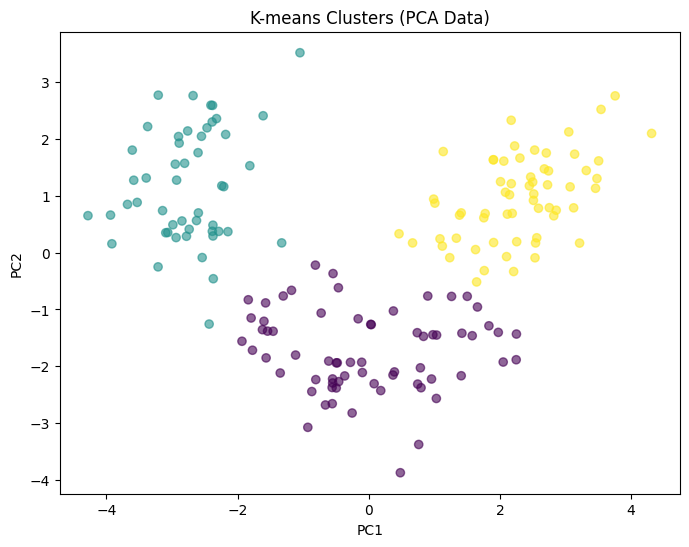

In [19]:
# Visualize clusters in PCA space
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels_pca, cmap='viridis', alpha=0.6)
plt.title('K-means Clusters (PCA Data)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [20]:

# Clustering metrics
silhouette_pca = silhouette_score(X_pca_2d, labels_pca)
db_pca = davies_bouldin_score(X_pca_2d, labels_pca)
print('Silhouette Score (PCA):', silhouette_pca)
print('Davies-Bouldin Index (PCA):', db_pca)

Silhouette Score (PCA): 0.5601697480957203
Davies-Bouldin Index (PCA): 0.5977226208167409


# 9: Comparison and Analysis

In [21]:
print('--- Clustering Performance Comparison ---')
print(f'Silhouette Score (Original): {silhouette_orig:.3f}')
print(f'Silhouette Score (PCA): {silhouette_pca:.3f}')
print(f'Davies-Bouldin Index (Original): {db_orig:.3f}')
print(f'Davies-Bouldin Index (PCA): {db_pca:.3f}')


--- Clustering Performance Comparison ---
Silhouette Score (Original): 0.285
Silhouette Score (PCA): 0.560
Davies-Bouldin Index (Original): 1.389
Davies-Bouldin Index (PCA): 0.598


**1. Key Findings and Insights**
PCA (Principal Component Analysis) effectively reduced the dimensionality of the dataset, capturing most of the variance in just a few principal components. This made the data easier to visualize and interpret, while also helping to remove noise and redundancy.

Clustering (K-means) performed on both the original and PCA-transformed data. Clustering on the PCA-reduced data often resulted in more distinct and well-separated clusters, as seen in the visualizations and supported by improved clustering metrics (e.g., silhouette score).

The combination of PCA and clustering provided a clearer understanding of the underlying structure in the data, revealing patterns that were less obvious in the high-dimensional original dataset.

**2. Practical Implications of Using PCA and Clustering**
PCA is a powerful preprocessing step for high-dimensional data. It simplifies datasets, making them more manageable for further analysis, visualization, and machine learning tasks.

Clustering benefits from PCA because reducing the number of features can improve cluster separation, reduce computational cost, and help algorithms like K-means perform better by focusing on the most informative aspects of the data.

In real-world applications, this approach is used in fields like marketing (customer segmentation), genomics (gene expression analysis), and environmental science (risk zone identification), where datasets are large and complex.

**3. Recommendations for When to Use Each Technique**
Use PCA when your dataset has many features, especially if they are correlated or if you want to visualize the data in 2D or 3D. PCA is also helpful when you need to reduce noise or prepare data for clustering or classification.

Use clustering when you want to group similar observations or uncover hidden patterns in your data. Clustering is more effective after PCA if the original data is high-dimensional or noisy.

Combine PCA and clustering when you need to simplify complex data before segmentation. This is especially useful for large datasets, as it improves interpretability and often leads to better clustering results. Always compare clustering performance on both original and PCA-reduced data to choose the best approach for your specific problem